# DENSE-DENSE AUTOENCODER

In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from main import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# MNIST DATASET
x_train, x_test, y_train, y_test = eda()
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [3]:
# DIMENSIONALITY REDUCTION
dim = 2

In [4]:
# ENCODER
encoder = dense_encoder(x_train.shape[1:], 300, dim)
encoder.summary()

Model: "Dense-Encocder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 602       
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_________________________________________________________________


In [5]:
# DECODER
decoder = dense_decoder(x_train.shape[1:], 300, dim)
decoder.summary()

Model: "Dense-Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               900       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               235984    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 236,884
Trainable params: 236,884
Non-trainable params: 0
_______________________________________________

In [6]:
# AUTOENCODER
inp = Input(shape=x_train.shape[1:])
mid = encoder(inp)
out = decoder(mid)

model = Model(inp, out, name="Dense-AutoEncoder")
model.summary()

Model: "Dense-AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
Dense-Encocder (Model)       (None, 2)                 236102    
_________________________________________________________________
Dense-Decoder (Model)        (None, 28, 28, 1)         236884    
Total params: 472,986
Trainable params: 472,986
Non-trainable params: 0
_________________________________________________________________


In [7]:
# TRAINING
model.compile(loss="mse", optimizer=Adam(lr=0.0005))
model.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0590 - val_loss: 0.0548
Epoch 2/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0541 - val_loss: 0.0530
Epoch 3/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0524 - val_loss: 0.0515
Epoch 4/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0512 - val_loss: 0.0507
Epoch 5/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0504 - val_loss: 0.0499
Epoch 6/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0498 - val_loss: 0.0494
Epoch 7/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0492 - val_loss: 0.0488
Epoch 8/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0486 - val_loss: 0.0482
Epoch 9/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0482 - val_

In [8]:
# PREDICTIONS
yhat = model.predict(x_train)
yhat.shape

(60000, 28, 28, 1)

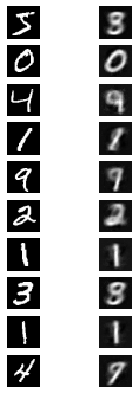

In [9]:
# ORIGINAL vs RECONSTRUCTED
n = 10
fig = plt.figure(figsize=(3, 7))
for i in range(n):
    before = x_train[i].squeeze()
    after = yhat[i].squeeze()
    ax = fig.add_subplot(n, 2, (i * 2) + 1)
    ax.imshow(before, cmap='gray')
    ax.axis('off')
    ax = fig.add_subplot(n, 2, (i * 2) + 2)
    ax.imshow(after, cmap='gray')
    ax.axis('off')

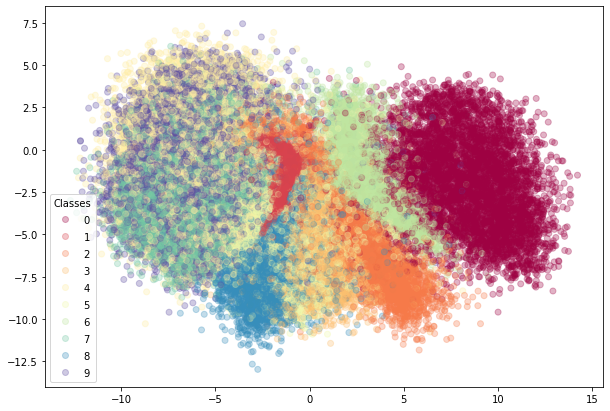

In [10]:
# LATENT SPACE
dim_2 = encoder.predict(x_train)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(*dim_2.T, c=y_train, alpha=0.3, cmap='Spectral')
elements = scatter.legend_elements()
plt.legend(*elements, title='Classes');

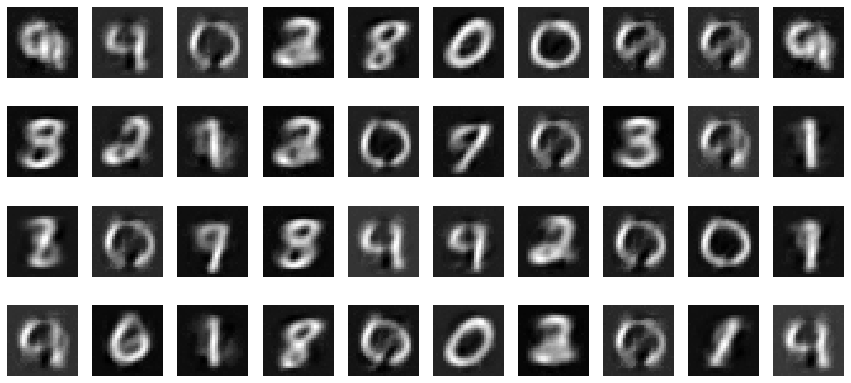

In [12]:
# GENERATING DIGITS BY SAMPLING FROM THE LATENT SPACE
fig = plt.figure(figsize=(15, 7))
for i in range(40):
    x, y = np.random.uniform(-12, 15, 2) # see graph above for potential values
    ax = fig.add_subplot(4, 10, i + 1)
    ax.imshow(decoder.predict([[x, y]]).reshape(28, 28), cmap='gray')
    ax.axis('off')

# END